In [9]:
import pandas as pd
import tweepy
import time
import numpy as np
import matplotlib.pyplot as plt
from tweepy import Stream
from tweepy.streaming import StreamListener
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
consumer_key  = 'd9Ksoz6Wb1jD0mqbW8rjaSNb7'
consumer_secret = 'pHXnVSJeLbOxaYlbOR7BWFdDNhZSF6IzegZV87qUSUqy6Qe8qG'
access_token = '3648603434-dGRu1nHet22tdoYeqaAGoN8MyZrNw9oXZQvGZUD'
access_token_secret = 'PZ8pcQBCb5zVPLRQNVQZc3Yzi0rz1wPef6O7RO7gzcvOf'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
# printing all the friends names of the user 
print('Name of the Friends of user')
friends = []
for friend in tweepy.Cursor(api.friends, screen_name = 'PoliceRajasthan').items(20):
    try:
                friends.append(friend.screen_name)
                print(friend.screen_name)
                time.sleep()
    except Exception as e:
                pass

with open("/home/radhey/Final_Project/Data/Leg_User_txt/friend1.txt", "w") as f:
     for item in friends:
        f.write("%s\n" % item)

Name of the Friends of user
MIB_India
RajITday
eMitraRajasthan
boxervijender
IndiaSports
unwomenindia
DainikBhaskar
MinistryWCD
BoomFactsHindi
PoliceJodhpur
PcrRural
AjmerPcr
pcrjaipurrural
PCRRajsamand
pcrnagaur
BharatpurPolice
AhmedabadPolice
dtptraffic
JprRuralPolice
Gulab_kataria


In [4]:
Total_Data = []
fo = open("/home/radhey/Final_Project/Data/Leg_User_txt/friend1.txt", "r")
f = fo.readlines()
fo.close()
dataset = map(lambda s: s.strip(),f)
try:
    for datavar in dataset:
        data = api.get_user(datavar)
        counter = 0
        for status in tweepy.Cursor(api.user_timeline, id = datavar).items(30):
            try:
                counter= counter+1
                Total_Data.append(status)
                time.sleep()
            except Exception as e:
                pass
except Exception as e:
    pass
print(len(Total_Data))

515


In [5]:
import urllib.parse
import pandas as pd

def process_http(string):
    url_count = 0
    for i in string.split():
        s, n, p, pa, q, f = urllib.parse.urlparse(i)
        if s and n:
            url_count += 1
    return url_count

def process_hashtag(string):
    hashtag_count = 0
    for i in string.split():
        s, n, p, pa, q, f = urllib.parse.urlparse(i)
        if i[:1] == '#':
            hashtag_count += 1
    return hashtag_count

def process_mention(string):
    mention_count=0
    for i in string.split():
        s, n, p, pa, q, f = urllib.parse.urlparse(i)
        if i[:1] == '@':
            mention_count += 1
    return mention_count

def process_data(Total_Data):
    TwittID = [tweet.id for tweet in Total_Data]
    #Making the dataset in pandas frame
    Data = pd.DataFrame(TwittID, columns = ['TwittID'])
    # processing the data in Tweet level
    
    Data["TextData"] = [tweet.text for tweet in Total_Data]
    Data["TweetCreatedAt"] = [tweet.created_at for tweet in Total_Data]
    Data["RetweetCount"] = [tweet.retweet_count for tweet in Total_Data]
    Data["TweetFavouriteCount"] = [tweet.favorite_count for tweet in Total_Data]
    Data["TweetSource"] = [tweet.source for tweet in Total_Data]
    
    # processing the data in User Graph level
    
    Data["UserID"] = [tweet.author.id for tweet in Total_Data]
    Data["UserScreenName"] = [tweet.author.screen_name for tweet in Total_Data]
    Data["UserName"] = [tweet.author.name for tweet in Total_Data]
    Data["UserCreatedAt"] = [tweet.author.created_at for tweet in Total_Data]
    Data["UserDescription"] = [tweet.author.description for tweet in Total_Data]
    Data["UserDescriptionLength"] = [len(tweet.author.description) for tweet in Total_Data]
    Data["UserFollowersCount"] = [tweet.author.followers_count for tweet in Total_Data]
    Data["UserFriendsCount"] = [tweet.author.friends_count for tweet in Total_Data]
    Data["UserLocation"] = [tweet.author.location for tweet in Total_Data]
    
    # Data["url"] = [tweet.author.url for in Total_Data]
    # Data["User_mention"] = [user_mentions.author.screen_name for tweet in Total_Data]
    # Data["HashTag"] = [hashtag.text for tweet in Total_Data]
    
    Data["HttpCount"] = [process_http(tweet.text) for tweet in Total_Data]
    Data["HashtagCount"] = [process_hashtag(tweet.text) for tweet in Total_Data]
    Data["MentionCount"] = [process_mention(tweet.text) for tweet in Total_Data]
    Data["TweetCount"] = [tweet.author.statuses_count for tweet in Total_Data]
    return Data
Data = process_data(Total_Data)
Data.shape

(515, 19)

In [6]:
Data.head(10)

,TwittID,TextData,TweetCreatedAt,RetweetCount,TweetFavouriteCount,TweetSource,UserID,UserScreenName,UserName,UserCreatedAt,UserDescription,UserDescriptionLength,UserFollowersCount,UserFriendsCount,UserLocation,HttpCount,HashtagCount,MentionCount,TweetCount
0,1128650515858853894,#IndiaatCannes: India Pavilion inaugurated at ...,2019-05-15 13:17:06,1,14,Twitter for Android,920488039,MIB_India,MIB India,2012-11-02 06:26:58,This is the official twitter account of Minist...,142,1008270,70,"New Delhi, India",1,2,1,106096
1,1128596468443402241,Workshop on Artificial Bio Organs held in Visa...,2019-05-15 09:42:21,1,6,Twitter Web App,920488039,MIB_India,MIB India,2012-11-02 06:26:58,This is the official twitter account of Minist...,142,1008270,70,"New Delhi, India",1,0,0,106096
2,1128591539364515840,RT @FTIIOfficial: 50 budding film-makers (31 b...,2019-05-15 09:22:45,3,0,Twitter for Android,920488039,MIB_India,MIB India,2012-11-02 06:26:58,This is the official twitter account of Minist...,142,1008270,70,"New Delhi, India",0,0,1,106096
3,1128590990581723136,RT @IIMC_India: Today - May 15th - is the last...,2019-05-15 09:20:35,24,0,Twitter for Android,920488039,MIB_India,MIB India,2012-11-02 06:26:58,This is the official twitter account of Minist...,142,1008270,70,"New Delhi, India",0,3,1,106096
4,1128548730674630656,RT @NFAIOfficial: A lovely still from #HumAapk...,2019-05-15 06:32:39,19,0,Twitter Web App,920488039,MIB_India,MIB India,2012-11-02 06:26:58,This is the official twitter account of Minist...,142,1008270,70,"New Delhi, India",0,2,3,106096
5,1128535118363054081,RT @ndmaindia: 15 May: Thunderstorm accompanie...,2019-05-15 05:38:34,17,0,TweetDeck,920488039,MIB_India,MIB India,2012-11-02 06:26:58,This is the official twitter account of Minist...,142,1008270,70,"New Delhi, India",0,0,1,106096
6,1128534219834048512,RT @ndmaindia: Heavy rainfall at isolated plac...,2019-05-15 05:34:59,8,0,Twitter for Android,920488039,MIB_India,MIB India,2012-11-02 06:26:58,This is the official twitter account of Minist...,142,1008270,70,"New Delhi, India",0,3,1,106096
7,1128275168374091778,Officer Trainees of the Indian Foreign Service...,2019-05-14 12:25:37,2,16,Twitter Web App,920488039,MIB_India,MIB India,2012-11-02 06:26:58,This is the official twitter account of Minist...,142,1008270,70,"New Delhi, India",1,0,0,106096
8,1128226114415906816,.@indiannavy will conduct the First Indian Nav...,2019-05-14 09:10:41,11,46,Twitter Web App,920488039,MIB_India,MIB India,2012-11-02 06:26:58,This is the official twitter account of Minist...,142,1008270,70,"New Delhi, India",1,0,0,106096
9,1128186416435945472,Central government extends ban on LTTE for fiv...,2019-05-14 06:32:57,7,23,Twitter Web App,920488039,MIB_India,MIB India,2012-11-02 06:26:58,This is the official twitter account of Minist...,142,1008270,70,"New Delhi, India",1,0,0,106096


# loading legitimate User Data

In [7]:
import pandas as pd
Total_leg_data = pd.read_csv('Leg_data.csv')
Total_leg_data.fillna(0, inplace=True)
Total_leg_data.shape

(11118, 21)

# Loading Spammer Data

In [8]:
Total_spam_data = pd.read_csv("Spam_data.csv")
Total_spam_data.fillna(0, inplace=True)
Total_spam_data.shape

(5394, 21)

# Check there is any missing value in data set

In [10]:
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()



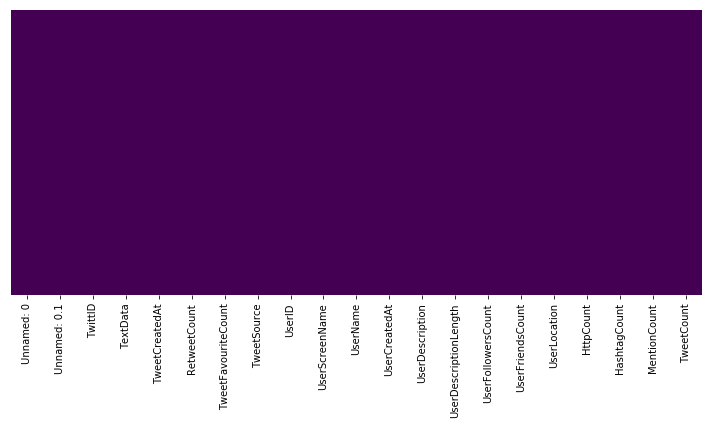

In [11]:
get_heatmap(Total_leg_data)

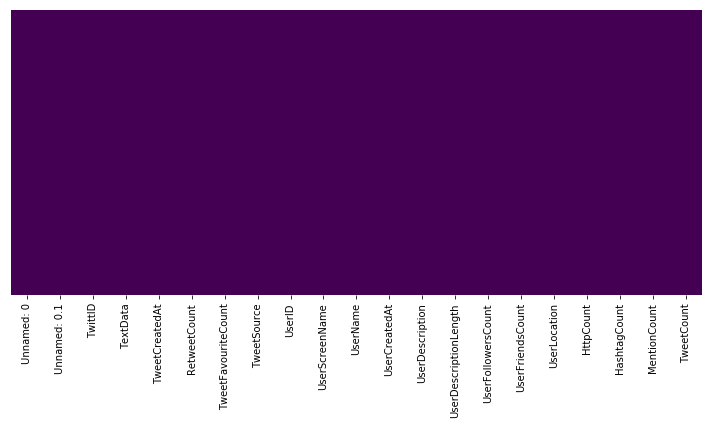

In [12]:
get_heatmap(Total_spam_data)

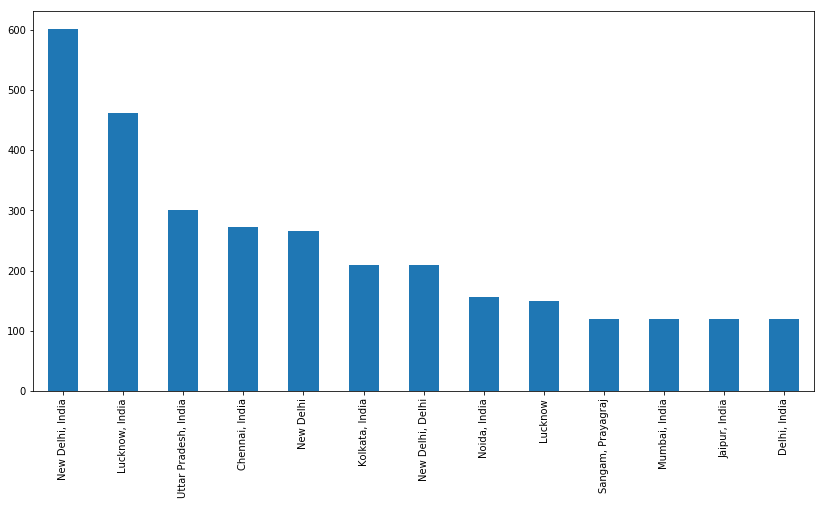

In [13]:
location_data = Total_leg_data['UserLocation'].value_counts()
location_data[2:15].plot(kind='bar', figsize=(14,7))

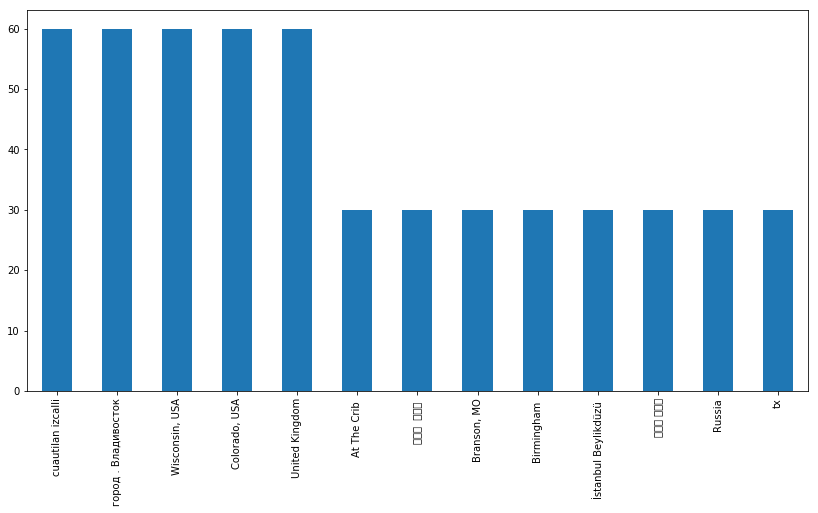

In [14]:
location_data = Total_spam_data['UserLocation'].value_counts()
location_data[2:15].plot(kind='bar', figsize=(14,7))

# Count a specific word in users tweet how many times it used in tweets
# Hypothesis is Legitimate users used that word very less compare to spammer


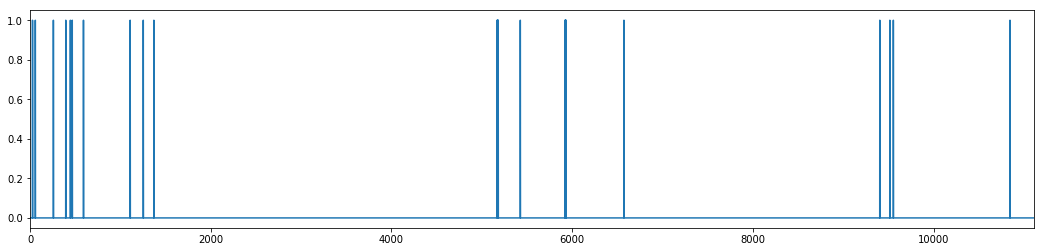

In [15]:
plt.rcParams['figure.figsize'] = (18,4)
plt.rcParams['font.family'] = 'sans-serif'
text = Total_leg_data['TextData']
is_sex = text.str.contains('sex')
is_sex=is_sex.astype(float)
is_sex.plot()

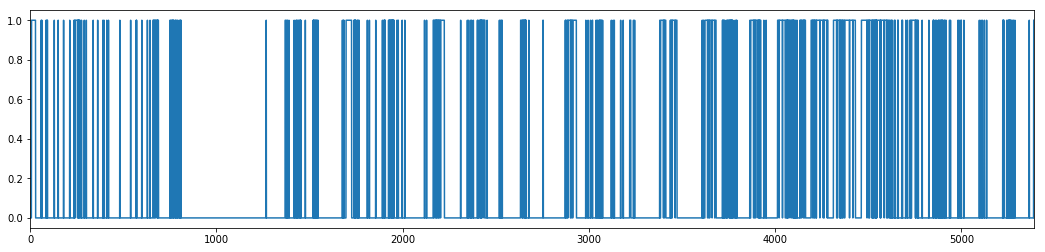

In [16]:
plt.rcParams['figure.figsize'] = (18,4)
plt.rcParams['font.family'] = 'sans-serif'
text = Total_spam_data['TextData']
is_sex = text.str.contains('sex')
is_sex=is_sex.astype(float)
is_sex.plot()

In [17]:
Total_leg_data=Total_leg_data.fillna(0)
Total_leg_data.shape

(11118, 21)

In [19]:
Total_spam_data=Total_spam_data.fillna(0)
Total_spam_data.shape

(5394, 21)

In [20]:
Total_leg_data[['RetweetCount']] = Total_leg_data[['RetweetCount']].astype(float)
Total_leg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 21 columns):
Unnamed: 0               11118 non-null int64
Unnamed: 0.1             11118 non-null int64
TwittID                  11118 non-null int64
TextData                 11118 non-null object
TweetCreatedAt           11118 non-null object
RetweetCount             11118 non-null float64
TweetFavouriteCount      11118 non-null int64
TweetSource              11118 non-null object
UserID                   11118 non-null int64
UserScreenName           11118 non-null object
UserName                 11118 non-null object
UserCreatedAt            11118 non-null object
UserDescription          11118 non-null object
UserDescriptionLength    11118 non-null int64
UserFollowersCount       11118 non-null int64
UserFriendsCount         11118 non-null int64
UserLocation             11118 non-null object
HttpCount                11118 non-null int64
HashtagCount             11118 non-null int64
Mention

In [21]:
Total_spam_data[['RetweetCount']] = Total_spam_data[['RetweetCount']].astype(float)
Total_spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5394 entries, 0 to 5393
Data columns (total 21 columns):
Unnamed: 0               5394 non-null int64
Unnamed: 0.1             5394 non-null int64
TwittID                  5394 non-null int64
TextData                 5394 non-null object
TweetCreatedAt           5394 non-null object
RetweetCount             5394 non-null float64
TweetFavouriteCount      5394 non-null int64
TweetSource              5394 non-null object
UserID                   5394 non-null int64
UserScreenName           5394 non-null object
UserName                 5394 non-null object
UserCreatedAt            5394 non-null object
UserDescription          5394 non-null object
UserDescriptionLength    5394 non-null int64
UserFollowersCount       5394 non-null int64
UserFriendsCount         5394 non-null int64
UserLocation             5394 non-null object
HttpCount                5394 non-null int64
HashtagCount             5394 non-null int64
MentionCount             539

In [22]:
Total_leg_data = Total_leg_data[Total_leg_data.TweetCount!=0]
len(Total_leg_data[Total_leg_data.TweetCount<30])

378

In [23]:
Total_spam_data = Total_spam_data[Total_spam_data.TweetCount!=0]
len(Total_spam_data[Total_spam_data.TweetCount<30])

54

# Adding different features to the dataset By calculating

# 1. AvgHashtag
# 2. AvgURLCount
# 3. AVgMention
# 4. Avg FavCount

In [24]:
Total_leg_data.loc[:,"AvgHashtag"] = (Total_leg_data.groupby('UserID')["HashtagCount"].transform('sum'))/30
Total_leg_data.loc[:,"AvgURLCount"] = (Total_leg_data.groupby('UserID')["HttpCount"].transform('sum'))/30
Total_leg_data.loc[:,"AvgMention"] = (Total_leg_data.groupby('UserID')["MentionCount"].transform('sum'))/30
Total_leg_data.loc[:,"AvgRetweet"] = (Total_leg_data.groupby('UserID')["RetweetCount"].transform('sum'))/30
Total_leg_data.loc[:,"AvgFavCount"] = (Total_leg_data.groupby('UserID')["TweetFavouriteCount"].transform('sum'))/30

In [25]:
Total_spam_data.loc[:,'AvgHashtag'] = (Total_spam_data.groupby('UserID')["HashtagCount"].transform('sum'))/30
Total_spam_data.loc[:,'AvgURLCount'] = (Total_spam_data.groupby('UserID')["HttpCount"].transform('sum'))/30
Total_spam_data.loc[:,'AvgMention'] = (Total_spam_data.groupby('UserID')["MentionCount"].transform('sum'))/30
Total_spam_data.loc[:,'AvgRetweet'] = (Total_spam_data.groupby('UserID')["RetweetCount"].transform('sum'))/30
Total_spam_data.loc[:,'AvgFavCount'] = (Total_spam_data.groupby('UserID')["TweetFavouriteCount"].transform('sum'))/30

# Selecting Unique columns only and droping the repeted rows

In [26]:
unique_leg_row = Total_leg_data[["UserID", "UserScreenName", "UserCreatedAt", "UserDescriptionLength","UserFollowersCount", "UserFriendsCount", "UserLocation", "AvgHashtag", "AvgURLCount", "AvgMention", "AvgRetweet", "AvgFavCount", "TweetCount"]]
leg_data = unique_leg_row.drop_duplicates()
leg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 11088
Data columns (total 13 columns):
UserID                   375 non-null int64
UserScreenName           375 non-null object
UserCreatedAt            375 non-null object
UserDescriptionLength    375 non-null int64
UserFollowersCount       375 non-null int64
UserFriendsCount         375 non-null int64
UserLocation             375 non-null object
AvgHashtag               375 non-null float64
AvgURLCount              375 non-null float64
AvgMention               375 non-null float64
AvgRetweet               375 non-null float64
AvgFavCount              375 non-null float64
TweetCount               375 non-null int64
dtypes: float64(5), int64(5), object(3)
memory usage: 41.0+ KB


In [27]:
unique_spam_row = Total_spam_data[["UserID", "UserScreenName", "UserCreatedAt", "UserDescriptionLength","UserFollowersCount", "UserFriendsCount", "UserLocation", "AvgHashtag", "AvgURLCount", "AvgMention", "AvgRetweet", "AvgFavCount", "TweetCount"]]
spam_data = unique_spam_row.drop_duplicates()
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 5364
Data columns (total 13 columns):
UserID                   177 non-null int64
UserScreenName           177 non-null object
UserCreatedAt            177 non-null object
UserDescriptionLength    177 non-null int64
UserFollowersCount       177 non-null int64
UserFriendsCount         177 non-null int64
UserLocation             177 non-null object
AvgHashtag               177 non-null float64
AvgURLCount              177 non-null float64
AvgMention               177 non-null float64
AvgRetweet               177 non-null float64
AvgFavCount              177 non-null float64
TweetCount               177 non-null int64
dtypes: float64(5), int64(5), object(3)
memory usage: 19.4+ KB


# Datatype conversion from object to float

In [28]:
leg_data[['UserFriendsCount']] = leg_data[['UserFriendsCount']].astype(float)
leg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 11088
Data columns (total 13 columns):
UserID                   375 non-null int64
UserScreenName           375 non-null object
UserCreatedAt            375 non-null object
UserDescriptionLength    375 non-null int64
UserFollowersCount       375 non-null int64
UserFriendsCount         375 non-null float64
UserLocation             375 non-null object
AvgHashtag               375 non-null float64
AvgURLCount              375 non-null float64
AvgMention               375 non-null float64
AvgRetweet               375 non-null float64
AvgFavCount              375 non-null float64
TweetCount               375 non-null int64
dtypes: float64(6), int64(4), object(3)
memory usage: 41.0+ KB


/home/radhey/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [29]:
spam_data[['UserFriendsCount']] = spam_data[['UserFriendsCount']].astype(float)
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 5364
Data columns (total 13 columns):
UserID                   177 non-null int64
UserScreenName           177 non-null object
UserCreatedAt            177 non-null object
UserDescriptionLength    177 non-null int64
UserFollowersCount       177 non-null int64
UserFriendsCount         177 non-null float64
UserLocation             177 non-null object
AvgHashtag               177 non-null float64
AvgURLCount              177 non-null float64
AvgMention               177 non-null float64
AvgRetweet               177 non-null float64
AvgFavCount              177 non-null float64
TweetCount               177 non-null int64
dtypes: float64(6), int64(4), object(3)
memory usage: 19.4+ KB


In [30]:
leg_data.loc[:, "SpammerOrNot"]=0
leg_data.tail()

/home/radhey/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/radhey/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,UserID,UserScreenName,UserCreatedAt,UserDescriptionLength,UserFollowersCount,UserFriendsCount,UserLocation,AvgHashtag,AvgURLCount,AvgMention,AvgRetweet,AvgFavCount,TweetCount,SpammerOrNot
10968,767677235805511680,mediaamantra,2016-08-22 10:58:10,128,1566,958.0,"Lucknow, India",0.400000,1.0,0.600000,3.400000,4.533333,14896,0
10998,67378160,DainikBhaskar,2009-08-20 18:04:36,76,634524,46.0,India,8.933333,4.0,1.333333,12.533333,87.900000,119712,0
11028,461841349,ZeeNewsHindi,2012-01-12 07:52:31,110,1868923,22.0,India,2.033333,2.9,1.500000,244.966667,992.166667,181029,0
11058,98362607,News18India,2009-12-21 12:11:21,47,1035839,89.0,India,2.033333,2.0,1.566667,20.733333,100.533333,285844,0
11088,3266889528,allahabdtraffic,2015-07-03 09:06:39,138,7608,146.0,"Allahabad, India",0.733333,0.7,1.966667,35.100000,2.633333,4937,0


In [31]:
spam_data.loc[:, "SpammerOrNot"]=1
spam_data.tail()

,UserID,UserScreenName,UserCreatedAt,UserDescriptionLength,UserFollowersCount,UserFriendsCount,UserLocation,AvgHashtag,AvgURLCount,AvgMention,AvgRetweet,AvgFavCount,TweetCount,SpammerOrNot
5214,956015377888305152,jcroldanroldan1,2018-01-24 04:06:42,0,393,3734.0,0,0.766667,1.066667,1.1,158.700000,0.000000,9382,1
5244,1103478268919980035,Sariw56676073,2019-03-07 02:11:35,0,12,0.0,0,8.233333,1.033333,0.0,0.000000,0.333333,114,1
5274,1036466998446710786,Cris9666450351,2018-09-03 04:12:43,0,19,44.0,0,0.766667,0.800000,1.4,97.533333,0.000000,1845,1
5304,125706019,Grinder0420,2010-03-23 16:13:23,96,2305,2587.0,0,0.100000,0.700000,1.1,22.433333,0.066667,143508,1
5364,1055696622,Giovannini8,2013-01-02 17:56:31,0,1755,2130.0,0,0.833333,1.766667,3.6,138.733333,0.000000,150737,1


In [32]:
leg_data["TweetCount"].describe()

count       375.000000
mean      41288.162667
std       93281.144477
min           1.000000
25%         324.000000
50%        3883.000000
75%       20650.000000
max      596778.000000
Name: TweetCount, dtype: float64

In [33]:
spam_data["TweetCount"].describe()

count    1.770000e+02
mean     2.532717e+04
std      9.549593e+04
min      1.000000e+00
25%      6.410000e+02
50%      4.744000e+03
75%      1.185200e+04
max      1.150378e+06
Name: TweetCount, dtype: float64

# Merging the legitimate and spammer data

In [34]:
frames = [leg_data, spam_data]
Total_data = pd.concat(frames, axis=0, sort=False)
Total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 0 to 5364
Data columns (total 14 columns):
UserID                   552 non-null int64
UserScreenName           552 non-null object
UserCreatedAt            552 non-null object
UserDescriptionLength    552 non-null int64
UserFollowersCount       552 non-null int64
UserFriendsCount         552 non-null float64
UserLocation             552 non-null object
AvgHashtag               552 non-null float64
AvgURLCount              552 non-null float64
AvgMention               552 non-null float64
AvgRetweet               552 non-null float64
AvgFavCount              552 non-null float64
TweetCount               552 non-null int64
SpammerOrNot             552 non-null int64
dtypes: float64(6), int64(5), object(3)
memory usage: 64.7+ KB


In [35]:
Total_data.reset_index()
Total_data.to_csv('Total_data.csv', sep=',', encoding='utf8')

In [36]:
import datetime
Total_data = pd.read_csv('Total_data.csv')
Total_data.fillna(0, inplace=True)
Current_Time = datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d %H:%M:%S')
Total_data.loc[:, "Current_Time"]=Current_Time
Total_data.to_csv('Total_data.csv', sep=',', encoding='utf8')
Total_data = pd.read_csv('Total_data.csv')

In [37]:
# converting string to float
Total_data["UserFriendsCount"] = Total_data["UserFriendsCount"].convert_objects(convert_numeric=False, copy=False)

/home/radhey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


# Adding Few more features to dataset
# 1. Adding Reputation feature to dataset
## We can calculate Reputation
## Follower count divided by the number of lists = TwitterReputation Ratio

In [38]:
Total_data.loc[:,"Reputation"]=Total_data["AvgRetweet"]/(Total_data["UserFollowersCount"])
Total_data["Reputation"].describe()

count    552.000000
mean       8.269775
std       50.470779
min        0.000000
25%        0.000053
50%        0.001945
75%        0.088739
max      740.500000
Name: Reputation, dtype: float64

In [39]:
data = Total_data
data["Current_Time"] = pd.to_datetime(data["Current_Time"])
data["UserCreatedAt"] = pd.to_datetime(data["UserCreatedAt"])
data['AgeOfAccount'] = (data['Current_Time'] - data['UserCreatedAt'])/np.timedelta64(1, 'D')
cols = ['AgeOfAccount']
data[cols] = data[cols].mask(data[cols]<0)
data.AgeOfAccount.describe()

count     552.000000
mean     1500.282283
std      1085.302359
min        24.124907
25%       541.360897
50%      1225.009832
75%      2230.456939
max      3918.356424
Name: AgeOfAccount, dtype: float64

In [40]:
data1 = data
data1.loc[:, "TweetPerDay"] = data1["TweetCount"]/data1["AgeOfAccount"]
data1["TweetPerDay"].describe()

count    552.000000
mean      17.418111
std       40.214002
min        0.001124
25%        0.790515
50%        3.251510
75%       13.877269
max      443.071970
Name: TweetPerDay, dtype: float64

In [43]:
data1.loc[:,"TweetPerFollower"] = data1["TweetCount"]/data1["UserFollowersCount"]
# data1["TweetPerFollower"]

In [44]:
#to remove unwanted data
data1.TweetPerFollower=data1.TweetPerFollower.round(2).fillna(0)
data1 = data1[np.isfinite(data1['TweetPerFollower'])]
data1["TweetPerFollower"].tail(3)

549    97.11
550    62.26
551    85.89
Name: TweetPerFollower, dtype: float64

In [45]:
data1.loc[:,"AgeByFollowing"] = data1["AgeOfAccount"]/data1["UserFriendsCount"]
data1 = data1[np.isfinite(data1['AgeByFollowing'])]
data1[['AgeByFollowing']] = data1[['AgeByFollowing']].astype(float)
data1["AgeByFollowing"].describe()

count     540.000000
mean       60.610020
std       236.390890
min         0.023882
25%         2.458230
50%         8.450217
75%        37.450708
max      3025.600058
Name: AgeByFollowing, dtype: float64

In [46]:
Total_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'UserID', 'UserScreenName',
       'UserCreatedAt', 'UserDescriptionLength', 'UserFollowersCount',
       'UserFriendsCount', 'UserLocation', 'AvgHashtag', 'AvgURLCount',
       'AvgMention', 'AvgRetweet', 'AvgFavCount', 'TweetCount', 'SpammerOrNot',
       'Current_Time', 'Reputation', 'AgeOfAccount', 'TweetPerDay',
       'TweetPerFollower'],
      dtype='object')

In [47]:
Total_data.describe()

,Unnamed: 0,Unnamed: 0.1,UserID,UserDescriptionLength,UserFollowersCount,UserFriendsCount,AvgHashtag,AvgURLCount,AvgMention,AvgRetweet,AvgFavCount,TweetCount,SpammerOrNot,Reputation,AgeOfAccount,TweetPerDay,TweetPerFollower
count,552.000000,552.000000,5.520000e+02,552.000000,5.520000e+02,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02,552.000000,552.000000,552.000000,552.000000,552.000000
mean,275.500000,4497.639493,4.379196e+17,78.128623,8.627813e+05,436.949275,0.732850,0.846437,1.235628,671.798068,539.279831,3.617024e+04,0.320652,8.269775,1500.282283,17.418111,14.978062
std,159.492947,3089.604034,4.709929e+17,57.297927,4.330840e+06,875.788595,1.530797,0.806712,1.480388,2216.553233,3009.417113,9.420575e+04,0.467151,50.470779,1085.302359,40.214002,36.634630
min,0.000000,0.000000,1.594458e+07,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,24.124907,0.001124,0.000000
25%,137.750000,1902.500000,1.331312e+09,19.000000,1.750000e+02,26.750000,0.033333,0.366667,0.233333,1.733333,0.066667,3.880000e+02,0.000000,0.000053,541.360897,0.790515,0.090000
50%,275.500000,3970.000000,4.719676e+09,85.000000,2.144000e+03,106.500000,0.300000,0.700000,0.933333,27.516667,1.400000,4.135500e+03,0.000000,0.001945,1225.009832,3.251510,0.630000
75%,413.250000,6874.500000,9.325983e+17,133.250000,5.071150e+04,366.500000,0.766667,1.000000,1.575000,210.208333,17.525000,1.813200e+04,1.000000,0.088739,2230.456939,13.877269,9.155000
max,551.000000,11088.000000,1.120038e+18,160.000000,4.693893e+07,5799.000000,13.000000,7.200000,13.466667,23010.800000,31557.466667,1.150378e+06,1.000000,740.500000,3918.356424,443.071970,390.400000


# Selecting the features for perdication and target class

In [49]:
X = data1[['Reputation', 'AvgHashtag', 'AvgRetweet', 'UserFollowersCount','UserFriendsCount', 'AvgFavCount', 'AvgMention', 'AvgURLCount', 'TweetCount', 'AgeOfAccount', 'TweetPerDay', 'TweetPerFollower', 'AgeByFollowing']]
y = data1["SpammerOrNot"]
data1.columns
X.shape

(540, 13)

# Implementing Different Models

# 1 K-Nearest Neighbor

In [51]:
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.multiclass import unique_labels

knn = KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

knn = knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))
print("Classifier performance report: ")
print(classification_report(y_test, y_pred_test))

Trainig Accuracy: 0.91534
Test Accuracy: 0.85802
Classifier performance report: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       115
           1       0.75      0.77      0.76        47

   micro avg       0.86      0.86      0.86       162
   macro avg       0.83      0.83      0.83       162
weighted avg       0.86      0.86      0.86       162



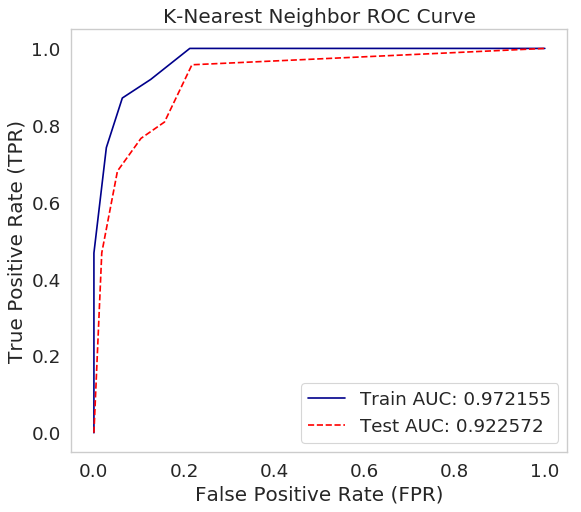

In [52]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = knn.predict_proba(X_train)
scores_test = knn.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_knn_train, tpr_knn_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_knn_test, tpr_knn_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)
fig=plt.figure(figsize=(8, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(fpr_knn_train, tpr_knn_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_knn_train, tpr_knn_train))
plt.plot(fpr_knn_test, tpr_knn_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_knn_test, tpr_knn_test))
plt.title("K-Nearest Neighbor ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

# Decision TreeClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

dt = dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))
print("Classifier performance report: ")
print(classification_report(y_test, y_pred_test))

Trainig Accuracy: 0.86243
Test Accuracy: 0.91358
Classifier performance report: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       115
           1       0.92      0.77      0.84        47

   micro avg       0.91      0.91      0.91       162
   macro avg       0.92      0.87      0.89       162
weighted avg       0.91      0.91      0.91       162



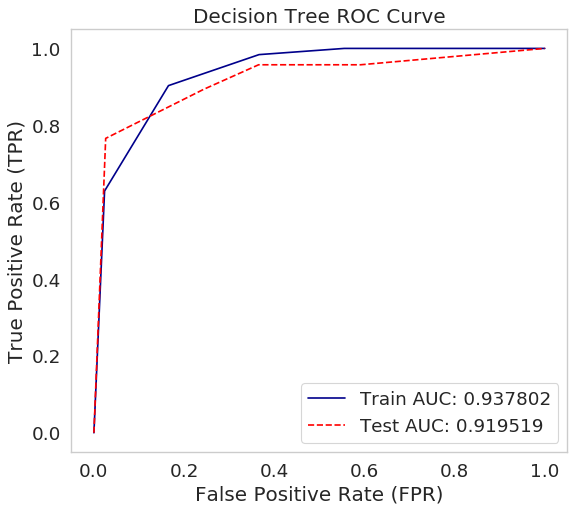

In [54]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = dt.predict_proba(X_train)
scores_test = dt.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)
fig=plt.figure(figsize=(8, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(fpr_dt_train, tpr_dt_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_dt_train, tpr_dt_train))
plt.plot(fpr_dt_test, tpr_dt_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_dt_test, tpr_dt_test))
plt.title("Decision Tree ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

# Naive Bayes Classifier

In [55]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0.0009)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

mnb = mnb.fit(X_train, y_train)
y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))
print("Classifier performance report: ")
print(classification_report(y_test, y_pred_test))

Trainig Accuracy: 0.65079
Test Accuracy: 0.54321
Classifier performance report: 
              precision    recall  f1-score   support

           0       0.98      0.37      0.53       115
           1       0.39      0.98      0.55        47

   micro avg       0.54      0.54      0.54       162
   macro avg       0.68      0.67      0.54       162
weighted avg       0.81      0.54      0.54       162



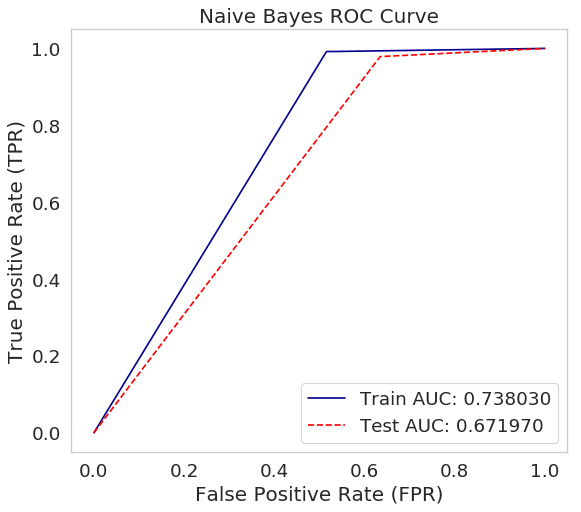

In [56]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = mnb.predict_proba(X_train)
scores_test = mnb.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_mnb_train, tpr_mnb_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_mnb_test, tpr_mnb_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)
fig=plt.figure(figsize=(8, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(fpr_mnb_train, tpr_mnb_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_mnb_train, tpr_mnb_train))
plt.plot(fpr_mnb_test, tpr_mnb_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_mnb_test, tpr_mnb_test))
plt.title("Naive Bayes ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=7, max_depth=7, min_samples_split=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rf = rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))
print("Classifier performance report: ")
print(classification_report(y_test, y_pred_test))

Trainig Accuracy: 0.98148
Test Accuracy: 0.91975
Classifier performance report: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       115
           1       0.85      0.87      0.86        47

   micro avg       0.92      0.92      0.92       162
   macro avg       0.90      0.91      0.90       162
weighted avg       0.92      0.92      0.92       162



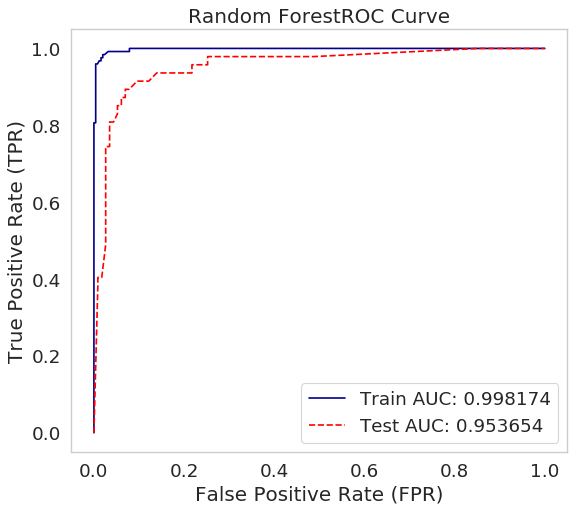

In [58]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = rf.predict_proba(X_train)
scores_test = rf.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)
fig=plt.figure(figsize=(8, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(fpr_rf_train, tpr_rf_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_rf_test, tpr_rf_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.title("Random ForestROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

# comparison between classifiers

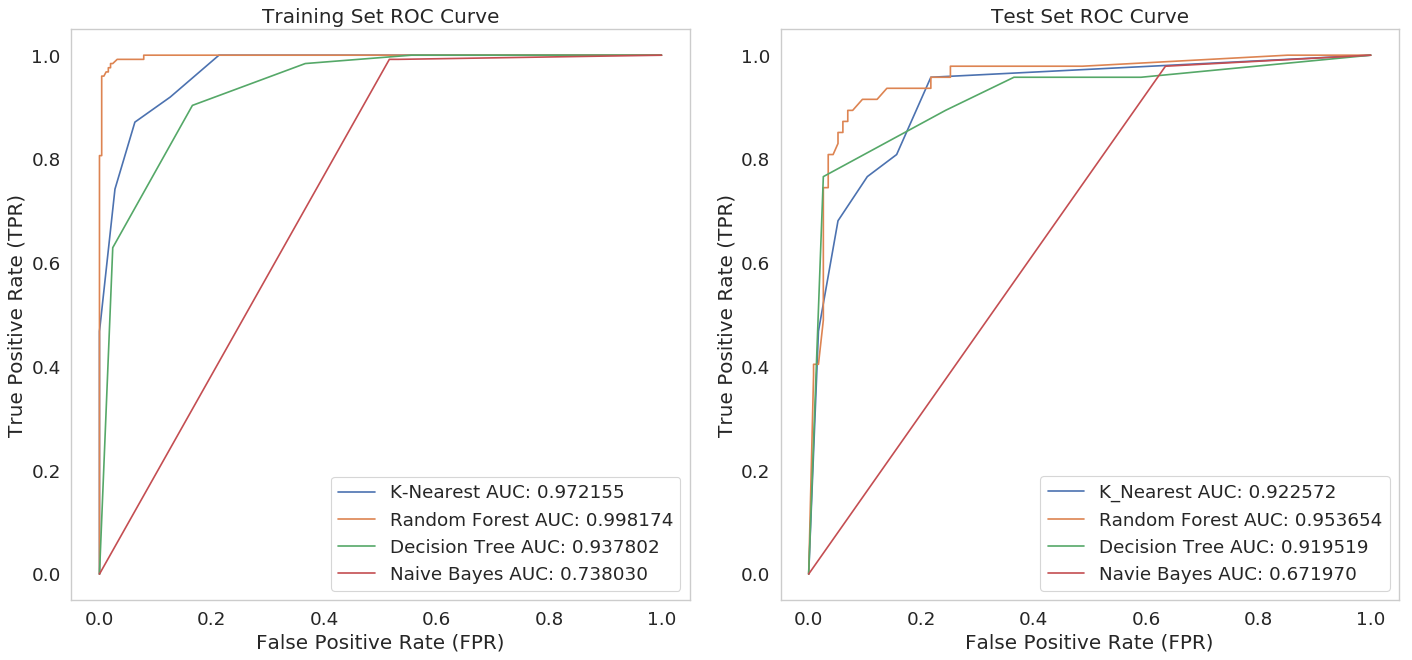

In [59]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
#Train ROC
plt.subplot(2,2,1)
plt.plot(fpr_knn_train, tpr_knn_train, label='K-Nearest AUC: %5f' %auc(fpr_knn_train, tpr_knn_train))
plt.plot(fpr_rf_train, tpr_rf_train, label='Random Forest AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_dt_train, tpr_dt_train, label='Decision Tree AUC: %5f' %auc(fpr_dt_train, tpr_dt_train))
plt.plot(fpr_mnb_train, tpr_mnb_train, label='Naive Bayes AUC: %5f' %auc(fpr_mnb_train, tpr_mnb_train))
plt.title("Training Set ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')


#Test ROC
plt.subplot(2,2,2)
plt.plot(fpr_knn_test, tpr_knn_test, label='K_Nearest AUC: %5f' %auc(fpr_knn_test, tpr_knn_test))
plt.plot(fpr_rf_test, tpr_rf_test, label='Random Forest AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.plot(fpr_dt_test, tpr_dt_test, label='Decision Tree AUC: %5f' %auc(fpr_dt_test, tpr_dt_test))
plt.plot(fpr_mnb_test, tpr_mnb_test, label='Navie Bayes AUC: %5f' %auc(fpr_mnb_test, tpr_mnb_test))
plt.title("Test Set ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')
plt.tight_layout()

# Thank you